# 1) K√ºt√ºphane ƒ∞mport

In [657]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [658]:
#C   Other Features
#p | x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
#e | x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g

# Ham  Dataset in  formatƒ± yukardaki gibi 
# Class deƒüeri ilk s√ºt√ºn, (p ve e deƒüerlerini i√ßeriyor) (edible=e, poisonous=p)

# 2) Veriyi ƒ∞√ße Aktarma

In [659]:
# S√ºtun isimlerini tanƒ±mla
columns = ['class','cap-shape','cap-surface','cap-color','bruises','odor',
           'gill-attachment','gill-spacing','gill-size','gill-color',
           'stalk-shape','stalk-root','stalk-surface-above-ring',
           'stalk-surface-below-ring','stalk-color-above-ring',
           'stalk-color-below-ring','veil-type','veil-color',
           'ring-number','ring-type','spore-print-color',
           'population','habitat']

# Veriyi oku
df = pd.read_csv('agaricus-lepiota.data', names=columns)

# 3) Dataset Kontrolleri

In [660]:
# D√ºzenlenmi≈ü veri setinin ilk 5 satƒ±rƒ±nƒ± g√∂ster
df.head()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [661]:
# D√ºzenlenmi≈ü veri setinin son 5 satƒ±rƒ±nƒ± g√∂ster
df.tail()

class cap-shape cap-surface cap-color bruises odor gill-attachment  \
8113     e         k           s         n       f    n               a   
8114     e         x           s         n       f    n               a   
8115     e         f           s         n       f    n               a   
8116     p         k           y         n       f    y               f   
8117     e         x           s         n       f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
8113            c         b          y  ...                        s   
8114            c         b          y  ...                        s   
8115            c         b          n  ...                        s   
8116            c         n          b  ...                        k   
8117            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
8113                      o                      o         p          o   
8114                      o                      o         p          n   
8115                      o                      o         p          o   
8116                      w                      w         p          w   
8117                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
8113           o         p                 b          c       l  
8114           o         p                 b          v       l  
8115           o         p                 b          c       l  
8116           o         e                 w          v       l  
8117           o         p                 o          c       l  

[5 rows x 23 columns]

In [662]:
# Datasetin i√ßindeki '?' deƒüerlerini kontrol et
df.isin(['?']).sum()

#√áƒ±ktƒ±:
# Sadece '?' deƒüerleri 'stalk-root' s√ºtununda var 2480 adet

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [663]:
# Datasetin i√ßinde bo≈ü deƒüerleri kontrol et
df.isnull().sum()

#√áƒ±ktƒ±:
# Sadece 'stalk-root' s√ºtununda bo≈ü deƒüerler var 2480 adet (? olarak g√∂z√ºk√ºyor)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [664]:
# Class deƒüerlerinin daƒüƒ±lƒ±mƒ±nƒ± kontrol et
df['class'].value_counts()

#√áƒ±ktƒ±: (Dengeli)
# e    4208
# p    3916

class
e    4205
p    3913
Name: count, dtype: int64

In [665]:

df.info()
#Dataset genel bilgileri
#√áƒ±ktƒ±:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 23 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8118 non-null   object
 1   cap-shape                 8118 non-null   object
 2   cap-surface               8118 non-null   object
 3   cap-color                 8118 non-null   object
 4   bruises                   8118 non-null   object
 5   odor                      8118 non-null   object
 6   gill-attachment           8118 non-null   object
 7   gill-spacing              8118 non-null   object
 8   gill-size                 8118 non-null   object
 9   gill-color                8118 non-null   object
 10  stalk-shape               8118 non-null   object
 11  stalk-root                8118 non-null   object
 12  stalk-surface-above-ring  8118 non-null   object
 13  stalk-surface-below-ring  8118 non-null   object
 14  stalk-color-above-ring  

In [666]:
#Tekrar eden deƒüerleri kontrol et
df.duplicated().sum()
#√áƒ±ktƒ±:
# 0


np.int64(0)

# 4) Data Analaizi ve Ke≈üfi

In [667]:
# Datasetin ayrƒ±ntƒ±lƒ± bilgilerini kontrol et
df.describe().T

count unique top  freq
class                     8118      2   e  4205
cap-shape                 8118      6   x  3653
cap-surface               8118      4   y  3244
cap-color                 8118     10   n  2284
bruises                   8118      2   f  4745
odor                      8118      9   n  3526
gill-attachment           8118      2   f  7908
gill-spacing              8118      2   c  6808
gill-size                 8118      2   b  5606
gill-color                8118     12   b  1728
stalk-shape               8118      2   t  4604
stalk-root                8118      5   b  3773
stalk-surface-above-ring  8118      4   s  5173
stalk-surface-below-ring  8118      4   s  4933
stalk-color-above-ring    8118      9   w  4459
stalk-color-below-ring    8118      9   w  4379
veil-type                 8118      1   p  8118
veil-color                8118      4   w  7918
ring-number               8118      3   o  7482
ring-type                 8118      5   p  3965
spore-print-color         8118      9   w  2388
population                8118      6   v  4040
habitat                   8118      7   d  3147

* Numerik bir verim olmadƒ±ƒüƒ± i√ßin ilk a≈üamada boxplot, histogram ve corr matrisi gibi metrikler ile kontrol yapmadƒ±m

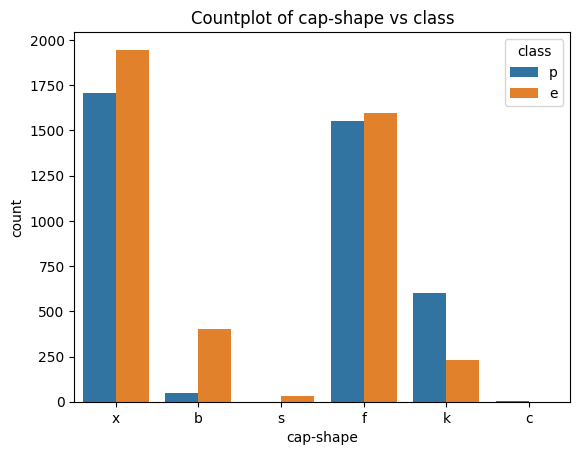

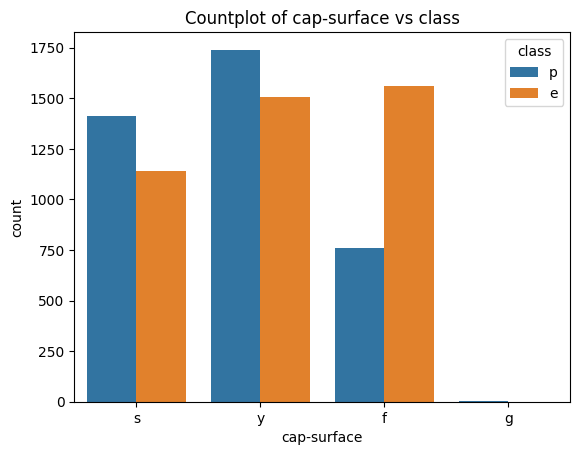

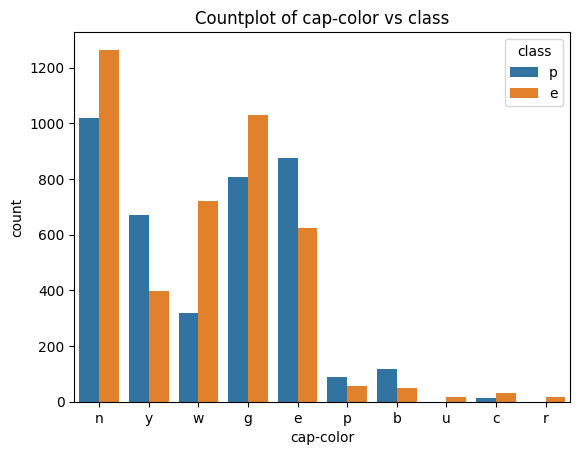

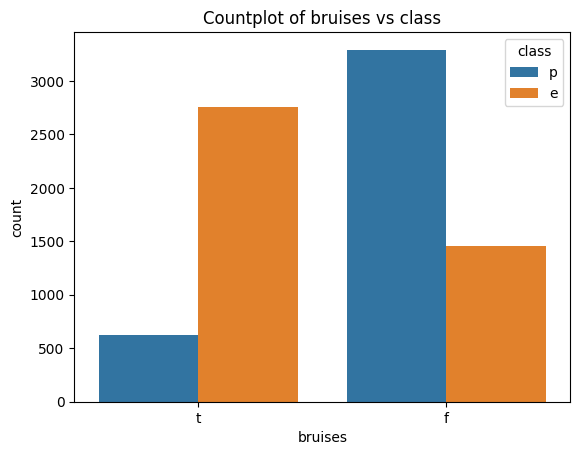

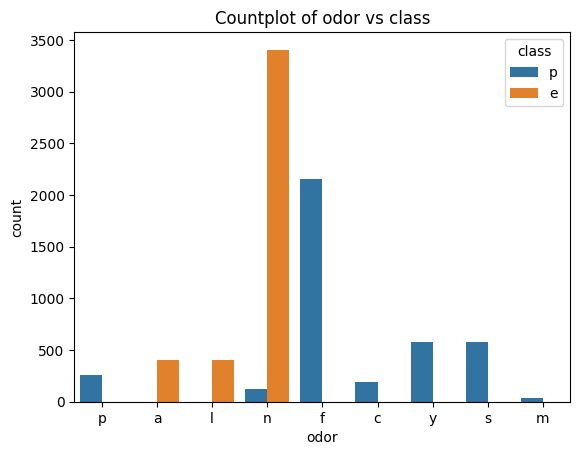

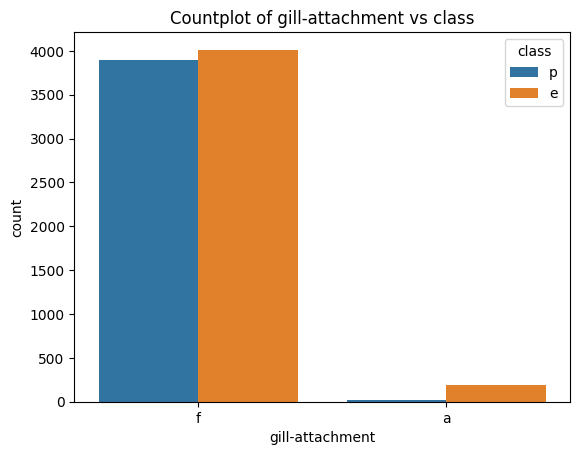

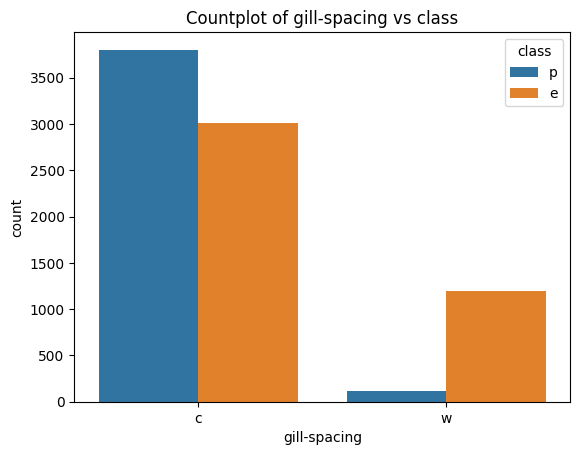

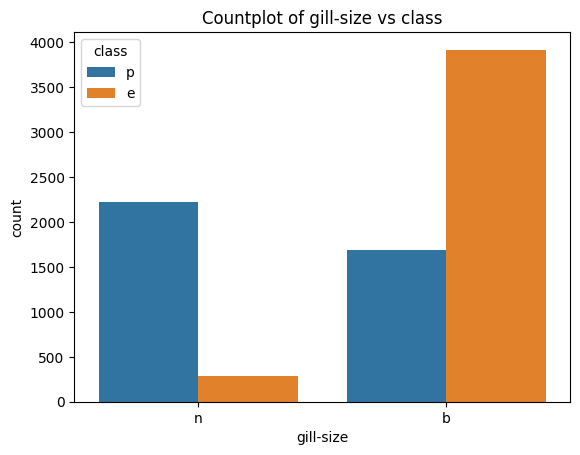

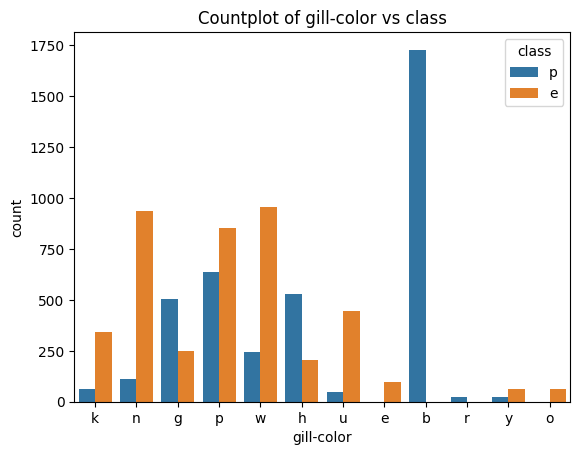

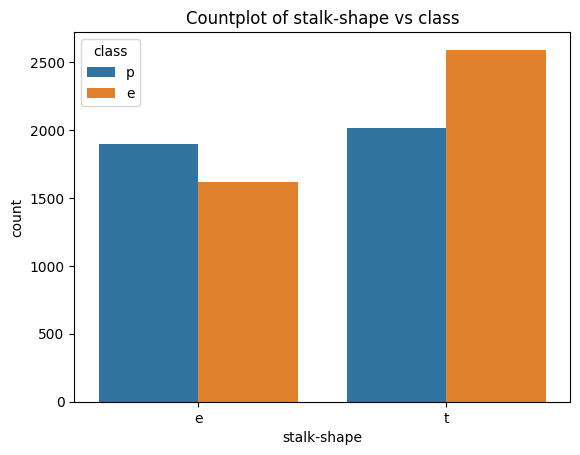

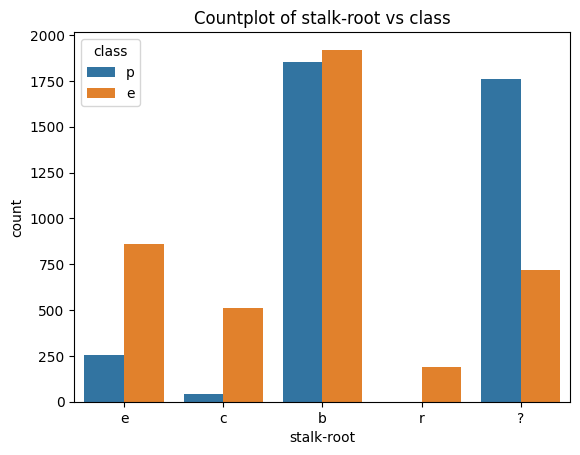

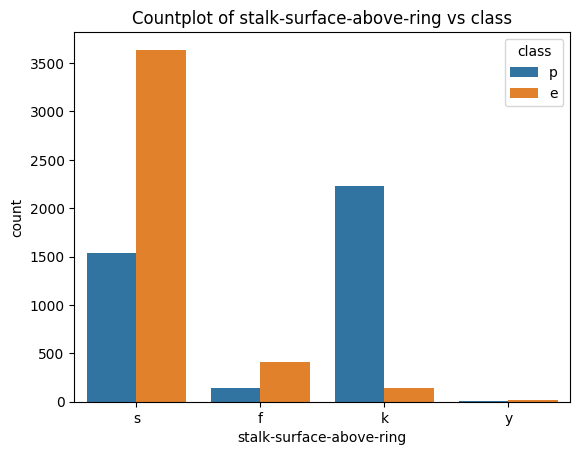

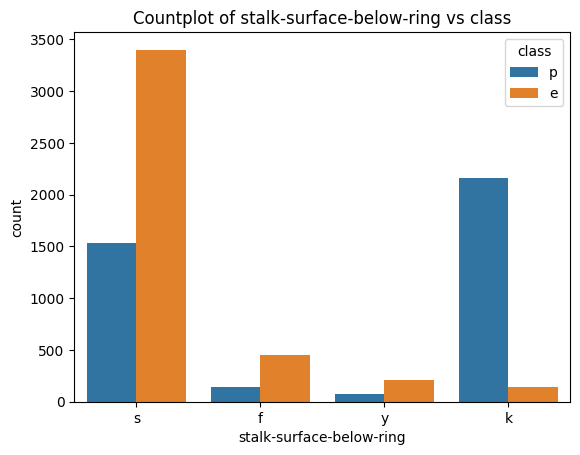

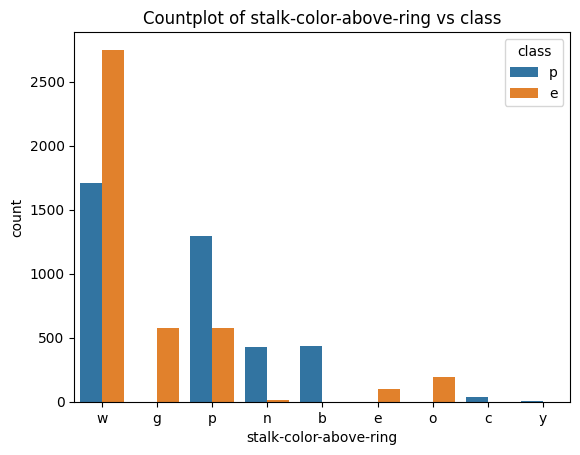

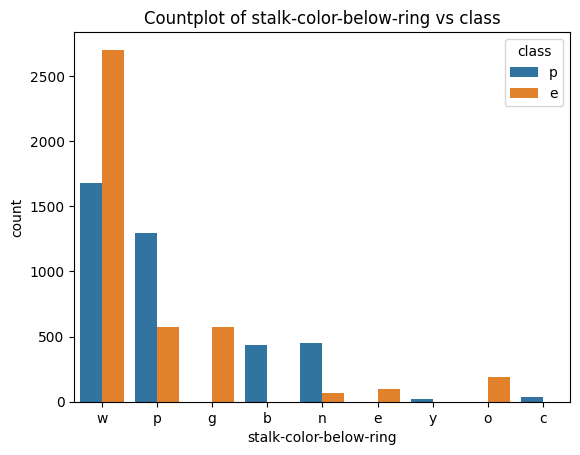

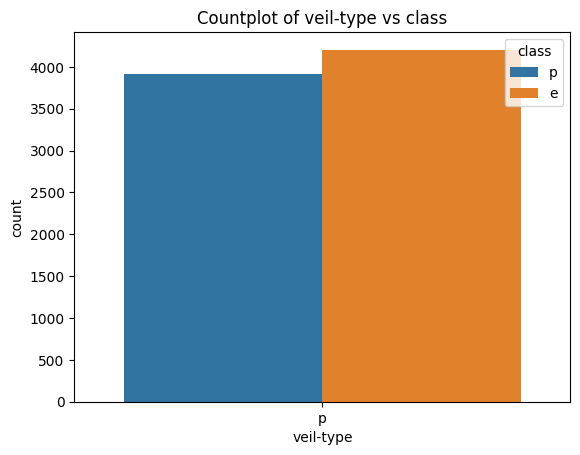

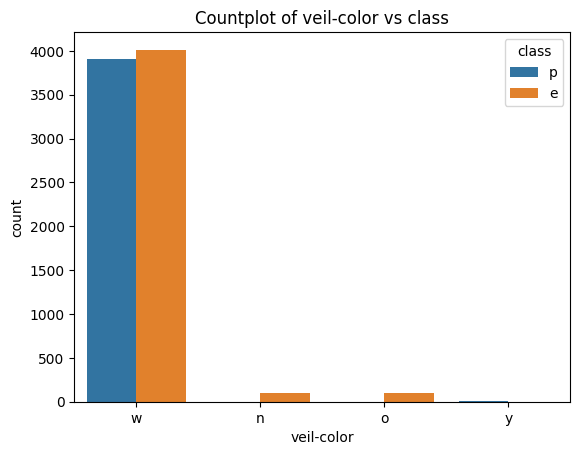

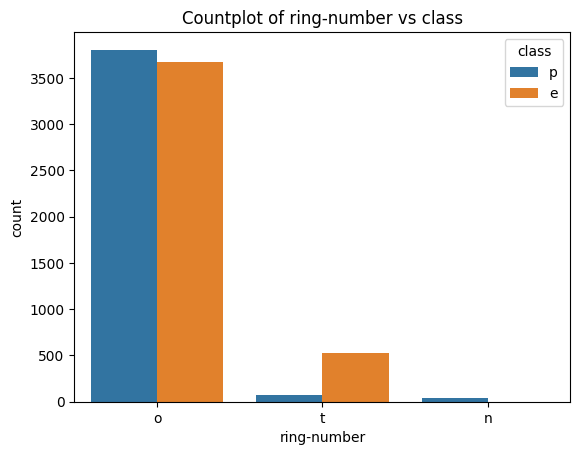

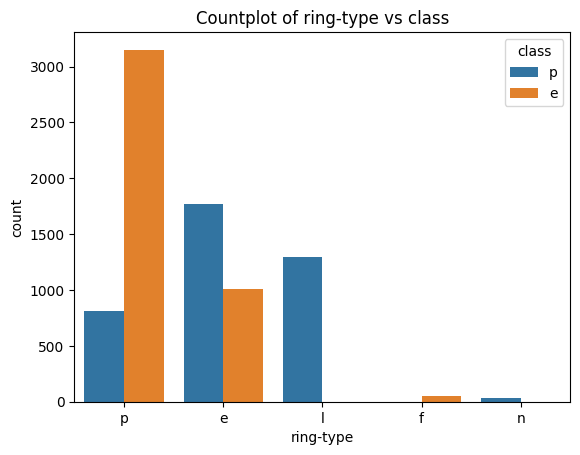

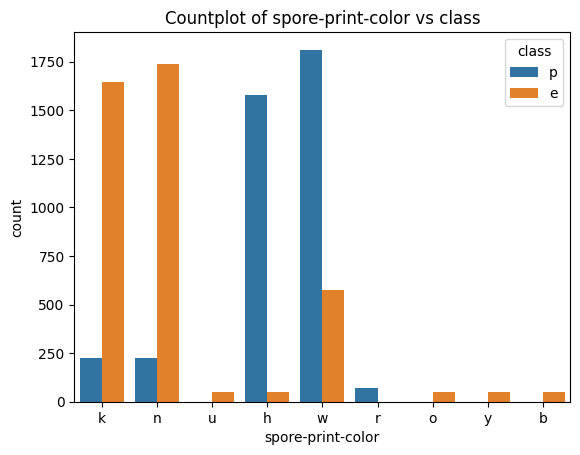

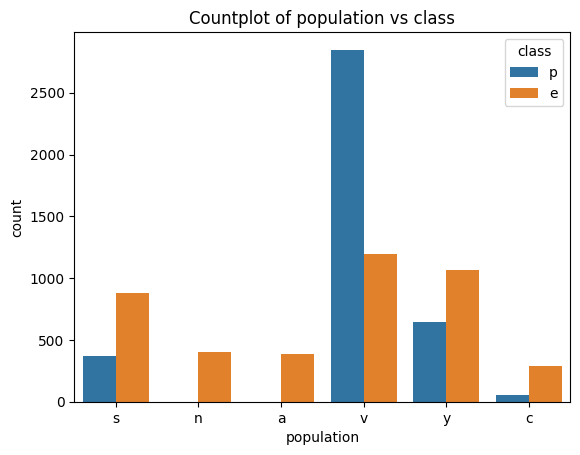

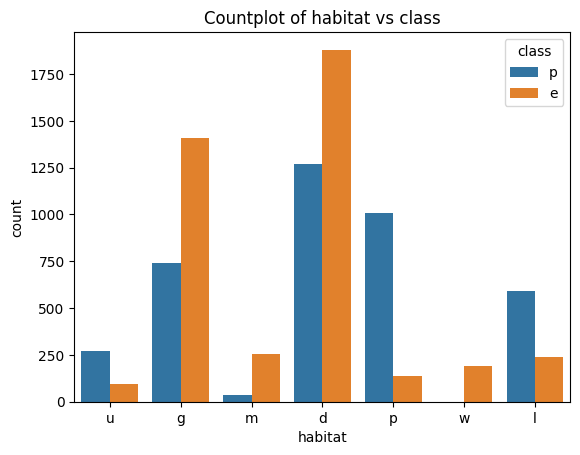

In [668]:
# Scatter plot ile ili≈ükileri anlama
for i in df.columns[1:]:
    sns.countplot(data=df, x=i, hue='class')
    plt.title(f'Countplot of {i} vs class')
    plt.show()


# sns.pairplot(df, hue='class', diag_kind='kde') 


-> Numrec degiskenler i√ßin G√ºzel √∂zellikler:
 * sns.distplot(df['price']) # o featurenin daƒüƒ±lƒ±mƒ±nƒ± veriyor g√ºzel bir analiz
 * sns.pairplot(df, hue='numeric', diag_kind='kde') 
 * df.corr()
 * df.corr["price"].sort_values()
 * verilerin %100 √º ile √ßalƒ±≈ümak istemiyorsan %99 uylada √ßalƒ±≈üabilirsin (13100 veriden 131 tanesini atabilirsin)
 * df.groupy("year").mean()["price"] -> yƒ±llarƒ± getiriyor ve yƒ±la g√∂re ortalama fiyatlarƒ± yƒ±lƒ±n yanƒ±na yazarak 2 sutunlu tablo olu≈üturuyor

# 5) Eksik deƒüer Yapƒ±landƒ±rmasƒ± 

In [669]:
# '?' deƒüerlerini NaN ile deƒüi≈ütir
df.replace('?', np.nan, inplace=True)

In [670]:
# Null deƒüerleri kontrol et
df.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [671]:
df['stalk-root'].value_counts()

stalk-root
b    3773
e    1118
c     555
r     192
Name: count, dtype: int64

üìå stalk-root √ñzelliƒüi √ñzeti:

* Toplam: 8124 veri

* Eksik deƒüer: 2480 (~%30.5 ‚Üí az deƒüil)

Kategori daƒüƒ±lƒ±mƒ±:

- b: 3776 (~46.5%)

- e: 1120 (~13.8%)

- c: 556 (~6.9%)

- r: 192 (~2.4%)



- Eksik verileri doldurmak i√ßin doƒüru y√∂ntem se√ßilmeli
- √ñrneƒüin ortalama ,ortanca, mod yada KNNinputer gibi y√∂ntemler kullanƒ±labilir
- Yaygƒ±n olarak eksik numeric verileri doldurmak i√ßin KNN imputer kullanƒ±lƒ±r. (bizim i√ßin uygun deƒüil)
- Yaygƒ±n olarak eksik Kategorik verileri doldurmak i√ßin en sƒ±k ge√ßen deƒüer (Mode) kullanƒ±lƒ±r.
- Ama Biz burda en iyi performans vereceƒüini d√º≈ü√ºnd√ºƒü√ºm i√ßin √∂zellik deƒüerlerinin aƒüƒ±rlƒ±klarƒ±na oranla rastgele deƒüerlerle dolduracaƒüƒ±z

In [672]:
# Mevcut eksik olmayan deƒüerleri bir diziye alalƒ±m
values = df['stalk-root'].dropna().values
# Eksik deƒüer sayƒ±sƒ±nƒ± hesaplayalƒ±m
missing_count = df['stalk-root'].isnull().sum()

# Mevcut deƒüerlerden eksik deƒüer sayƒ±sƒ± kadar rastgele se√ßiyoruz
# Bu deƒüerlerin daƒüƒ±lƒ±mƒ±nƒ± koruyarak eksik deƒüerleri dolduracaƒüƒ±z
# Rastgele se√ßim yaparken mevcut deƒüerlerin daƒüƒ±lƒ±mƒ±nƒ± korumak i√ßin p parametresini kullanƒ±yoruz.
# replace=True ‚Üí aynƒ± deƒüer birden fazla se√ßilebilir
imputed_values = np.random.choice(['b', 'e', 'c', 'r'], size=missing_count, replace=True, p=[0.4, 0.3, 0.2, 0.1])

# Eksik deƒüerleri bu rastgele se√ßilen deƒüerlerle dolduruyoruz
df.loc[df['stalk-root'].isnull(), 'stalk-root'] = imputed_values

In [673]:
# Null deƒüerleri kontrol et
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# 6) Outliers Yapƒ±landƒ±rmasƒ± 


- Mushroom dataset'inde veriler kategorik olduƒüu i√ßin outlier Yapƒ±landƒ±rmasƒ±na gerek yok
- Eƒüer yapmak isteydik boxplot √ßizdirerek aykƒ±rƒ± deƒüerleri tespit edebilirdik

# 7) Tekrar Eden ve ƒ∞≈üeyaramaz verilerin Yapƒ±landƒ±rmasƒ±

In [674]:
# √áift deƒüerleri kontrol et
df.duplicated().sum()
#√áƒ±ktƒ±:
# 0

np.int64(0)

# 8) Data Encoding
 

üìå Class S√ºt√ºnu

- Binary target (e / p) ‚Üí yani 2 sƒ±nƒ±flƒ± bir hedef deƒüi≈üken
- üìå Label Encoding en doƒüru ve standart y√∂ntemdir.
- ‚úÖ class ‚Üí Label Encoding

üìå Diƒüer S√ºt√ºnlar

- üçÑ cap-shape ‚Üí bell, conical, convex, flat, knobbed, sunken
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ cap-surface ‚Üí fibrous, grooves, scaly, smooth
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ cap-color ‚Üí brown, buff, cinnamon, gray, green, pink, purple, red, white, yellow
- ‚úÖ Sƒ±rasƒ±z renkler ‚Üí One-hot

- üçÑ bruises? ‚Üí bruises, no
- üìå Binary ama herhangi bir sƒ±ralama yok, burada

- DL modeline direkt Label encoding verilebilir (0/1)

- Ama modelin katmanlarƒ±nda bias yaratmamasƒ± i√ßin One-hot encoding tercih edilir
- ‚úÖ Yani burada One-hot encoding

- üçÑ odor ‚Üí almond, anise, creosote, fishy, foul, musty, none, pungent, spicy
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ gill-attachment ‚Üí attached, descending, free, notched
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ gill-spacing ‚Üí close, crowded, distant
- ‚úÖ Sƒ±ralƒ± gibi durabilir (crowded < close < distant?) ama veri s√∂zl√ºƒü√ºnde b√∂yle bir bilgi yok, sƒ±ralama anlamƒ± yok ‚Üí One-hot

- üçÑ gill-size ‚Üí broad, narrow
- üìå Binary ama sƒ±ralama var mƒ±?
- B ‚Üí geni≈ü N ‚Üí dar
- Belki sƒ±ralƒ± sayƒ±labilir ama √ßoƒüu DL uygulamasƒ±nda One-hot encoding tercih edilir
- ‚úÖ Yine One-hot

- üçÑ gill-color ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-shape ‚Üí enlarging, tapering
- üìå 2 deƒüerli ama sƒ±ralƒ± deƒüil
- ‚úÖ One-hot

- üçÑ stalk-root ‚Üí bulbous, club, cup, equal, rhizomorphs, rooted, missing
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-surface-above-ring ‚Üí fibrous, scaly, silky, smooth
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-surface-below-ring ‚Üí aynƒ± ‚Üí One-hot
- üçÑ stalk-color-above-ring ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ stalk-color-below-ring ‚Üí aynƒ± ‚Üí One-hot
- üçÑ veil-type ‚Üí partial, universal
- üìå Binary ama veri daƒüƒ±lƒ±mƒ±nda genelde hep aynƒ± olabilir (kontrol et)
- Eƒüer tek tip deƒüilse ‚Üí One-hot

- üçÑ veil-color ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ ring-number ‚Üí none, one, two
- ‚úÖ Aslƒ±nda sayƒ± sƒ±rasƒ± var ama kategorik deƒüer olduƒüu i√ßin ve DL modelde bias yaratmamasƒ± i√ßin One-hot encoding

- üçÑ ring-type ‚Üí cobwebby, evanescent, flaring, large, none, pendant, sheathing, zone
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ spore-print-color ‚Üí renkler
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ population ‚Üí abundant, clustered, numerous, scattered, several, solitary
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot

- üçÑ habitat ‚Üí grasses, leaves, meadows, paths, urban, waste, woods
- ‚úÖ Sƒ±rasƒ±z ‚Üí One-hot


In [675]:
df['veil-type'].value_counts()

veil-type
p    8118
Name: count, dtype: int64

* 'veil-type' √∂zelliƒüi sadece p deƒüeri i√ßeriyor
* Bu √∂zellik Modele katkƒ± saƒülamayacaƒüƒ± i√ßin √ßƒ±karƒ±lmƒ±≈ütƒ±r

In [676]:
# 'veil-type' s√ºtununu kaldƒ±rƒ±yoruz √ß√ºnk√º sadece tek bir deƒüere sahip
df.drop(columns=['veil-type'], inplace=True)

In [677]:
# S√ºtun isimlerini kontrol et
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

* df = Encode edilmemi≈ü, Null deƒüerleri dolduru≈ü, 'veil-type' √∂zelliƒüi √ßƒ±karƒ±lmƒ±≈ü data

In [678]:
# Class s√ºtunu i√ßin Label Encoding
le = LabelEncoder()
# kopy alƒ±yoruz √ß√ºnk√º orijinal veri setini deƒüi≈ütirmek istemiyoruz
df_encoded = df.copy()
# 'class' s√ºtununu label encoding ile sayƒ±sal deƒüerlere d√∂n√º≈üt√ºr√ºyoruz
df_encoded['class'] = le.fit_transform(df['class'])

In [679]:
# One-hot encoding uygulanacak s√ºtunlar (class hari√ß t√ºm kategorik s√ºtunlar)
one_hot_cols = [
    'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
    'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
    'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
    'spore-print-color', 'population', 'habitat'
]

# One-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=one_hot_cols)


* df_encoded = Encode edilmi≈ü, Null deƒüerleri dolduru≈ü, 'veil-type' √∂zelliƒüi √ßƒ±karƒ±lmƒ±≈ü data

In [680]:
df_encoded.info()
# One-hot encoding sonrasƒ± veri setinin boyutunu kontrol et
# √áƒ±ktƒ±:
# RangeIndex: 8124 entries, 0 to 8123
# Data columns (total 119 columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8118 entries, 0 to 8117
Columns: 116 entries, class to habitat_w
dtypes: bool(115), int64(1)
memory usage: 975.2 KB


In [681]:
df_encoded.head()
# One-hot encoding sonrasƒ± veri setinin ilk 5 satƒ±rƒ±nƒ± g√∂ster

class  cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0      1        False        False        False        False        False   
1      0        False        False        False        False        False   
2      0         True        False        False        False        False   
3      1        False        False        False        False        False   
4      0        False        False        False        False        False   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  ...  \
0         True          False          False           True  ...   
1         True          False          False           True  ...   
2        False          False          False           True  ...   
3         True          False          False          False  ...   
4         True          False          False           True  ...   

   population_s  population_v  population_y  habitat_d  habitat_g  habitat_l  \
0          True         False         False      False      False      False   
1         False         False         False      False       True      False   
2         False         False         False      False      False      False   
3          True         False         False      False      False      False   
4         False         False         False      False       True      False   

   habitat_m  habitat_p  habitat_u  habitat_w  
0      False      False       True      False  
1      False      False      False      False  
2       True      False      False      False  
3      False      False       True      False  
4      False      False      False      False  

[5 rows x 116 columns]

In [682]:
df_encoded.shape
# √áƒ±ktƒ±:
# (8124, 119)

(8118, 116)

# 9) Deep Learning ile Model Eƒüitimi

In [683]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix



In [684]:
y = df_encoded["class"].values
x = df_encoded.drop(columns=["class"]).values

In [685]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [686]:
x

array([[False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [687]:
# Modeli train ve test setine ayƒ±r
# x ve y'yi %70 train %30 test setine ayƒ±rƒ±yoruz (yaygƒ±n kullanƒ±m)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
 

In [688]:
# Ayrƒ±lan veri setlerinin boyutlarƒ±nƒ± kontrol et
len(x_train), len(x_test), len(y_train), len(y_test)

(7306, 812, 7306, 812)

In [689]:
scaler = MinMaxScaler()
# Veriyi √∂l√ßeklendir
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [690]:
x_train.shape

(7306, 115)

In [691]:
# Modeli olu≈ütur
model = Sequential()
# 1. ƒ∞lk (Giri≈ü) Katmanlarƒ±
# relu aktivasyon fonksiyonu, doƒürusal olmayan ili≈ükileri √∂ƒürenmeyi saƒülar
# 115 n√∂ron, ReLU aktivasyon fonksiyonu, giri≈ü ≈üekli x_train'in boyutu
# BatchNormalization ve Dropout katmanlarƒ± ekleriz
model.add(Dense(20, activation='relu', input_shape=(x_train.shape[1],)))
#BatchNormalization(): 
# Eƒüitim sƒ±rasƒ±nda katman √ßƒ±ktƒ±sƒ±nƒ± normalize eder,√∂ƒürenmeyi hƒ±zlandƒ±rƒ±r ve daha stabil hale getirir.
model.add(BatchNormalization())
# Dropout: A≈üƒ±rƒ± √∂ƒürenmeyi √∂nlemek i√ßin rastgele n√∂ronlarƒ± kapatƒ±r
model.add(Dropout(0.5))

# 2. Orta (Gizli) Katmanlar
# 64 n√∂ron, ReLU aktivasyon fonksiyonu
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='relu'))
model.add(Dropout(0.5))

# 3. √áƒ±kƒ±≈ü Katmanƒ±
# 1 n√∂ron, sigmoid aktivasyon fonksiyonu (binary classification i√ßin)
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Derleme
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Erken durdurma
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Eƒüitme
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=1,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


229/229 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 3ms/step - accuracy: 0.5580 - loss: 0.8623 - val_accuracy: 0.9113 - val_loss: 0.4802


In [692]:
# Test sonrasƒ± deƒüerlendirme
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 2ms/step - accuracy: 0.9176 - loss: 0.4815 
Test Accuracy: 0.9113


In [693]:
# Sƒ±nƒ±flandƒ±rma raporu
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       449
           1       0.98      0.82      0.89       363

    accuracy                           0.91       812
   macro avg       0.93      0.90      0.91       812
weighted avg       0.92      0.91      0.91       812



*  Confusion Matrix (Karƒ±≈üƒ±klƒ±k Matrisi)

26/26 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step 


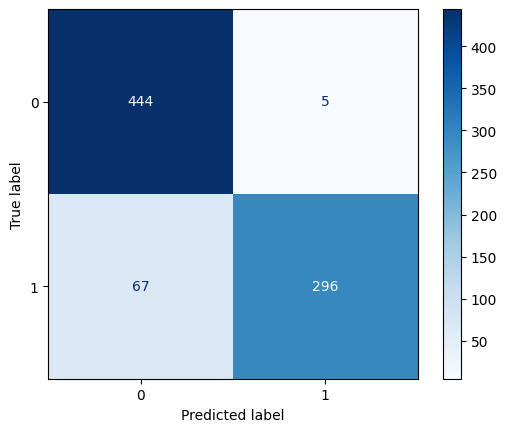

In [694]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Test verisi √ºzerinde tahmin
y_pred = model.predict(x_test)
y_pred_classes = (y_pred > 0.5).astype("int32")  # Binary class i√ßin threshold

# Confusion matrix olu≈ütur ve g√∂ster
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')

* ROC Curve (Alƒ±cƒ± √áalƒ±≈üma Karakteristik Eƒürisi)

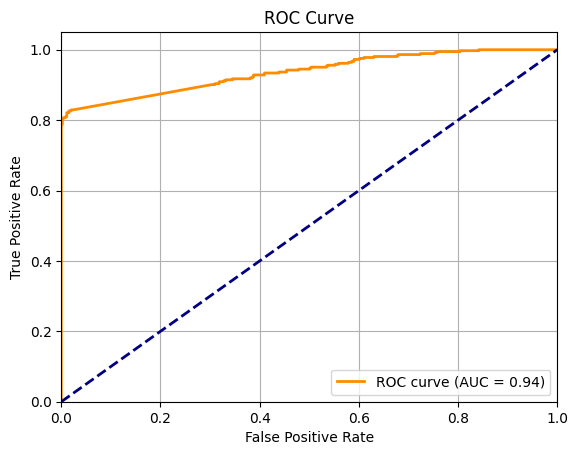

In [695]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve i√ßin deƒüerler
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# ROC grafiƒüi
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [696]:
raw_samples = [
    "p,f,s,b,t,f,f,c,b,p,t,b,f,s,w,w,w,o,p,h,s,u",
    "p,f,s,g,t,f,f,c,b,h,t,b,s,s,w,w,w,o,p,h,s,u",
    "p,x,f,y,f,f,f,c,b,p,e,b,k,k,n,p,w,o,l,h,y,d",
    "e,x,s,y,t,l,f,c,b,n,e,c,s,s,w,w,w,o,p,n,n,m",
    "e,f,s,g,f,n,f,w,b,n,t,e,f,f,w,w,w,o,e,n,a,g",
    "e,x,s,w,f,n,f,w,b,h,t,e,s,f,w,w,w,o,e,n,s,g"
    
]

# Stringleri liste haline getir
sample_rows = [row.split(",") for row in raw_samples]

# Ana veri setinde kullanƒ±lan kolon isimlerini buraya girmen gerek
# Eƒüer elinde orijinal kolon adlarƒ± varsa buraya yaz
# √ñrnek olarak 23 s√ºtunluk bir veri seti i√ßin (bu mushroom dataset olabilir):
column_names = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor",
    "gill-attachment", "gill-spacing", "gill-size", "gill-color",
    "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring",
    "stalk-color-below-ring", "veil-color", "ring-number",
    "ring-type", "spore-print-color", "population", "habitat"
]

# DataFrame'e √ßevir
df_new = pd.DataFrame(sample_rows, columns=column_names)


In [697]:

# Eƒüitimdeki encoding'i uygulamak i√ßin: df_encoded ile aynƒ± s√ºtun yapƒ±sƒ±nƒ± olu≈üturmalƒ±sƒ±n
# df_encoded = pd.get_dummies(df, drop_first=True) yaptƒ±ysan burada da aynƒ±sƒ±nƒ± yap:
df_new_encoded = pd.get_dummies(df_new.drop("class", axis=1))



In [698]:
# Eƒüitimdeki s√ºtunlarƒ± al
model_columns = df_encoded.drop("class", axis=1).columns

# Yeni veriyi aynƒ± s√ºtunlara g√∂re hizala, eksik olanlarƒ± 0 ile doldur
df_new_encoded = df_new_encoded.reindex(columns=model_columns, fill_value=0)

# Eƒüitimde kullandƒ±ƒüƒ±n scaler ile yeni veriyi √∂l√ßeklendir
df_new_encoded_scaled = scaler.transform(df_new_encoded)

# Tahmin et
predictions = model.predict(df_new_encoded_scaled)
predicted_classes = (predictions > 0.5).astype(int)

print("Baƒüƒ±msƒ±z √∂rneklerin tahmin edilen sƒ±nƒ±flarƒ±:")
print(predicted_classes.flatten())


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 31ms/step
Baƒüƒ±msƒ±z √∂rneklerin tahmin edilen sƒ±nƒ±flarƒ±:
[1 1 1 0 0 0]


c:\Users\gelis\Desktop\Bilgisayar M√ºhendisliƒüi\Sƒ±nƒ±f-3\Bahar\Veri Madenciliƒüi\odev2\.venv-tf\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
